**Apply any of the following learning algorithms to learn the parameters of the supervised single layer feed forward neural network.**

**a. Stochastic Gradient Descent**

**b. Mini Batch Gradient Descent**

**c. Momentum GD**


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
%matplotlib inline

In [ ]:
x=np.linspace(0, 25, 30)
y=-2*x+1

In [ ]:
print(x)

[ 0.          0.86206897  1.72413793  2.5862069   3.44827586  4.31034483
  5.17241379  6.03448276  6.89655172  7.75862069  8.62068966  9.48275862
 10.34482759 11.20689655 12.06896552 12.93103448 13.79310345 14.65517241
 15.51724138 16.37931034 17.24137931 18.10344828 18.96551724 19.82758621
 20.68965517 21.55172414 22.4137931  23.27586207 24.13793103 25.        ]


In [ ]:
print(y)

[  1.          -0.72413793  -2.44827586  -4.17241379  -5.89655172
  -7.62068966  -9.34482759 -11.06896552 -12.79310345 -14.51724138
 -16.24137931 -17.96551724 -19.68965517 -21.4137931  -23.13793103
 -24.86206897 -26.5862069  -28.31034483 -30.03448276 -31.75862069
 -33.48275862 -35.20689655 -36.93103448 -38.65517241 -40.37931034
 -42.10344828 -43.82758621 -45.55172414 -47.27586207 -49.        ]


Batch GD

In [ ]:
def  GD_single_LR(x,y,epochs,learning_rate):
    m=len(y)
    theta0=0     #bias
    theta1=0     #weight
    cost_history=[]
    theta0_history=[]
    theta1_history=[]

    for i in range(epochs):
        h = theta0 + theta1*x     #predicted value
        cost = sum([error**2 for error in (h-y)]) / 2*m
        cost_history.append(cost)

        theta0 = theta0 - (learning_rate * np.sum(h-y) / m)
        theta1 = theta1 - (learning_rate * (np.sum((h-y)*x) / m))

        theta0_history.append(theta0)
        theta1_history.append(theta1)
    return h,theta0_history,theta1_history,cost_history

In [ ]:
h,theta0_history,theta1_history,cost_history=GD_single_LR(x,y,1000,0.003)

In [ ]:
r2_score(y, h)

0.9996952592701436

plot loss vs epochs

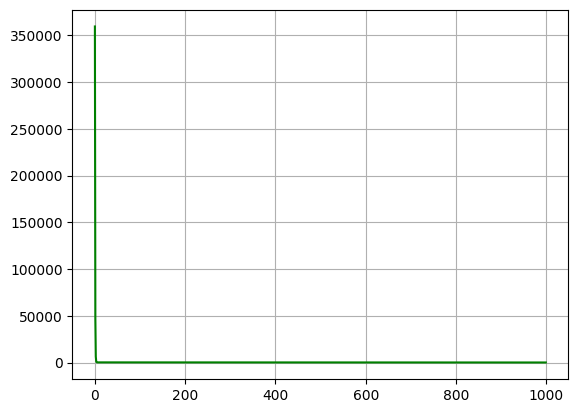

In [ ]:
fig,ax=plt.subplots()
ax.plot(cost_history,'g-')
plt.grid()
plt.show()

Plot Theta_0 vs. loss and Theta_1 vs. loss

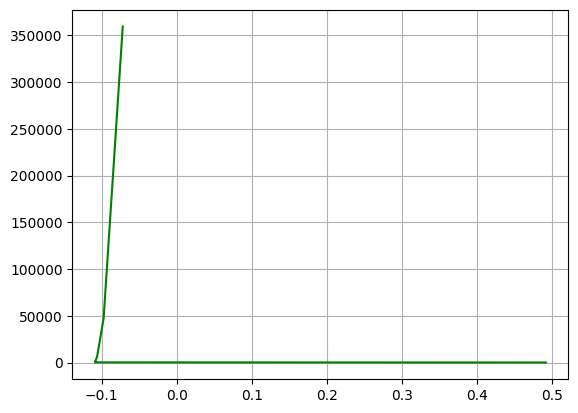

In [ ]:
fig,ax=plt.subplots()
ax.plot(theta0_history,cost_history,'g-')
plt.grid()
plt.show()

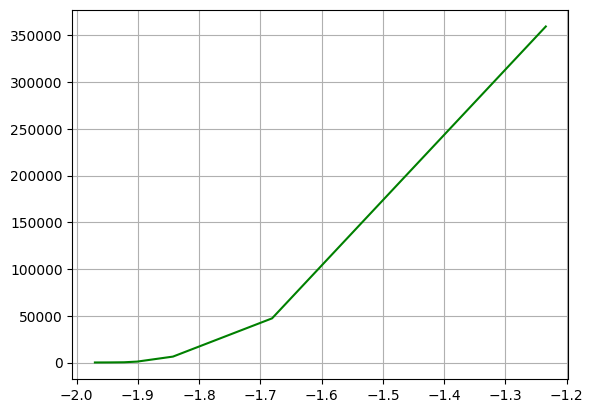

In [ ]:
fig,ax=plt.subplots()
ax.plot(theta1_history,cost_history,'g-')
plt.grid()
plt.show()

Plot all regression lines till converge

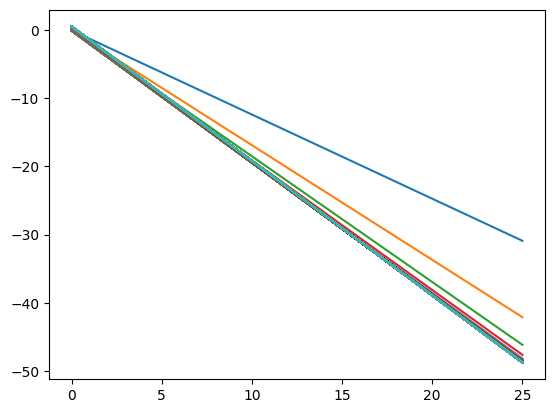

In [ ]:
fig, ax = plt.subplots()
for t0,t1 in zip(theta0_history,theta1_history):
    plt.plot(x,x*t1+t0)

plt.show()

best regresion line

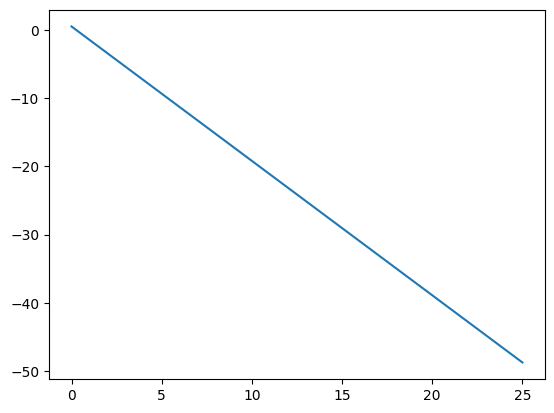

In [ ]:
fig, ax = plt.subplots()
plt.plot(x,x*theta1_history[-1]+theta0_history[-1])

plt.show()

Mini batch GD

In [ ]:
def  GD_single_Mini_batches_LR(x,y,epochs,learning_rate,batches):
    m=len(y)
    theta0=0
    theta1=0
    cost_history=[]
    theta0_history=[]
    theta1_history=[]
    for e in range(epochs):
        for j in range(0,m,batches):
            x_batch=x[j:j+batches]
            y_batch=y[j:j+batches]
            h = theta0 + theta1*x_batch
            cost = sum([error**2 for error in (h-y_batch)]) / 2*m
            cost_history.append(cost)

            theta0 = theta0 - (learning_rate * np.sum(h-y_batch) / m)
            theta1 = theta1 - (learning_rate * (np.sum((h-y_batch)*x_batch) / m))

            theta0_history.append(theta0)
            theta1_history.append(theta1)
    return theta0_history,theta1_history,cost_history

In [ ]:
theta0_history,theta1_history,cost_history=GD_single_Mini_batches_LR(x,y,1000,0.004,10)
h= theta0_history[-1] + theta1_history[-1]*x

In [ ]:
len(h)

30

In [ ]:
y

array([  1.        ,  -0.72413793,  -2.44827586,  -4.17241379,
        -5.89655172,  -7.62068966,  -9.34482759, -11.06896552,
       -12.79310345, -14.51724138, -16.24137931, -17.96551724,
       -19.68965517, -21.4137931 , -23.13793103, -24.86206897,
       -26.5862069 , -28.31034483, -30.03448276, -31.75862069,
       -33.48275862, -35.20689655, -36.93103448, -38.65517241,
       -40.37931034, -42.10344828, -43.82758621, -45.55172414,
       -47.27586207, -49.        ])

PLotting

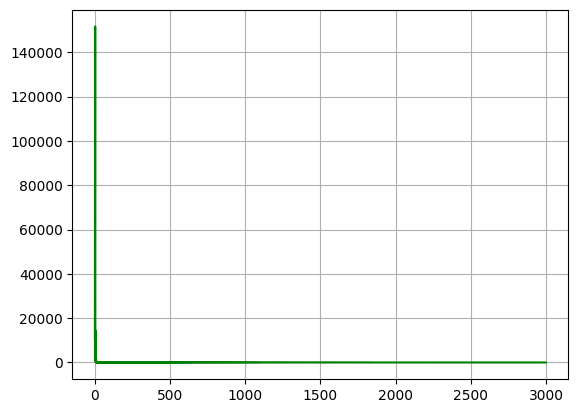

In [ ]:
fig,ax=plt.subplots()
ax.plot(cost_history,'g-')
plt.grid()
plt.show()

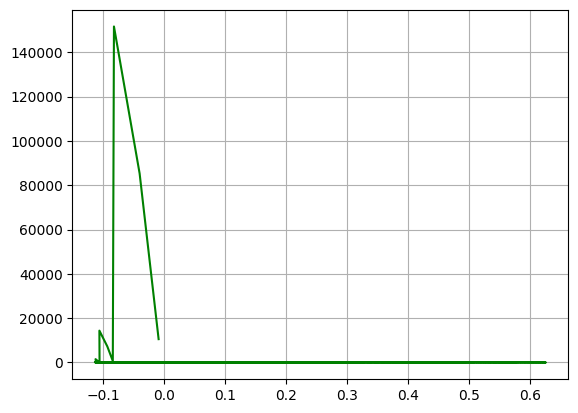

In [ ]:
fig,ax=plt.subplots()
ax.plot(theta0_history,cost_history,'g-')
plt.grid()
plt.show()

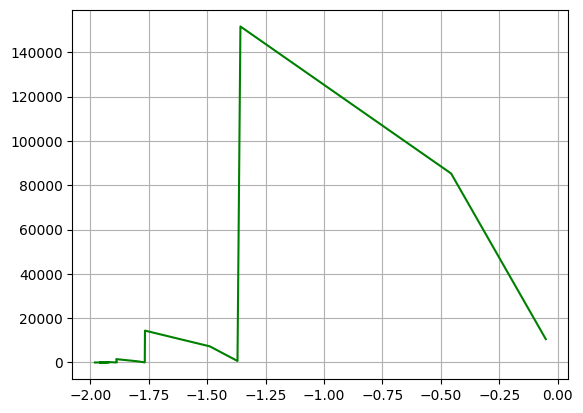

In [ ]:
fig,ax=plt.subplots()
ax.plot(theta1_history,cost_history,'g-')
plt.grid()
plt.show()

Stochastic GD

In [ ]:
def Stochastic_GD(x,y,learning_rate,epochs):
    theta0=0
    theta1=0
    m=float(len(y))
    cost_history=[]
    hypothesis=[]
    theta_0_history=[]
    theta_1_history=[]
    for i in range(epochs):
        h = theta0 + theta1*x
        cost = sum([data**2 for data in (h-y)]) / 2*m
        cost_history.append(cost)
        hypothesis.append(h)
        theta_0_history.append(theta0)
        theta_1_history.append(theta1)

        theta0 = theta0 - (learning_rate * (h-y) / m)
        theta1 = theta1 - (learning_rate * (((h-y)*x) / m))
    return theta0,theta1,cost_history,hypothesis,theta_0_history,theta_1_history

In [ ]:
theta0,theta1,cost_history,hypothesis,theta_0_history,theta_1_history=Stochastic_GD(x,y,0.05,100)

In [ ]:
r2_score(y, hypothesis[-1])

0.9993208318693333

Plot loss vs epochs

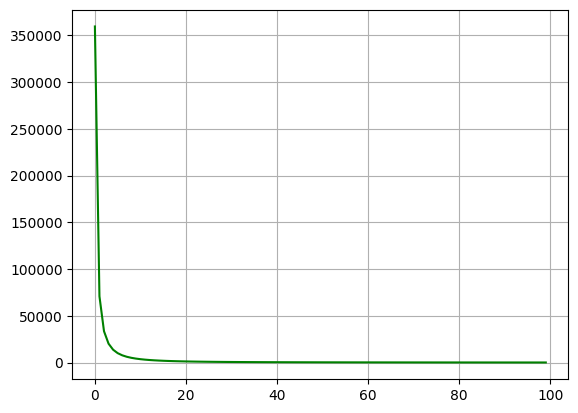

In [ ]:
fig,ax=plt.subplots()
ax.plot(cost_history,'g-')
plt.grid()
plt.show()

Plot the best regression line

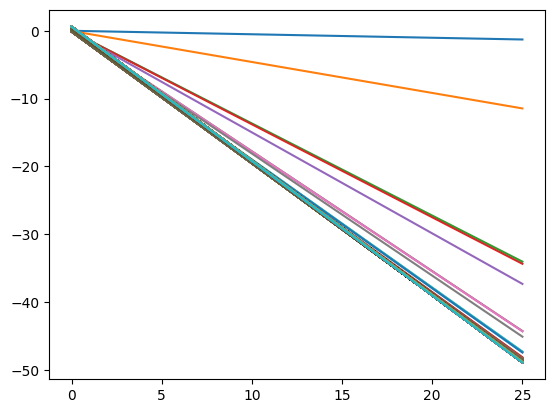

In [ ]:
fig, ax = plt.subplots()
for t0,t1 in zip(theta0_history,theta1_history):
    plt.plot(x,x*t1+t0)

plt.show()

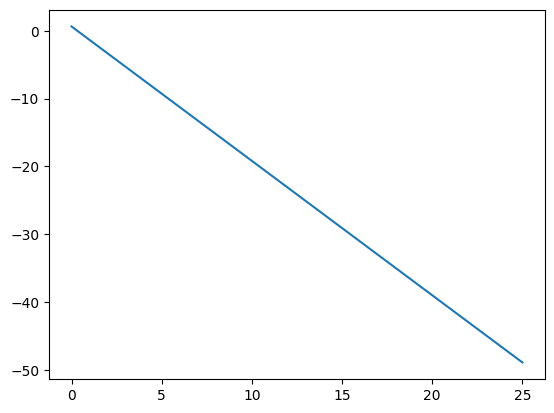

In [ ]:
fig, ax = plt.subplots()
plt.plot(x,x*theta1_history[-1]+theta0_history[-1])

plt.show()